In [1]:
import streamlit as st
import pandas as pd
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import random
import os
folder = '../data/group3/config_1'
file = random.choice(os.listdir(folder))

In [3]:
# nombre max d'iterations
iterations = np.max([int(i.split('_')[1].split('.')[0]) for i in os.listdir('../data/group3/config_1')])
iterations

25

In [4]:
folder = '../data/group3/config_1'
iteration = 10
number = 8
filename = folder + '/' + str(number) + '_' + str(iteration) + '.csv'
filename

'../data/group3/config_1/8_10.csv'

In [5]:
data = pd.read_csv(filename)

# make predictions

In [6]:
from utils import stepwise_predictions, linearize, make_binary
import pickle


# load data by each timestep
num,_ = stepwise_predictions(data)
print(f"average feature caluation is {np.mean(_)}")

# load the model and scaler from disk
model = pickle.load(open('ressources/RandomForestClasssifer_2D.sav', 'rb'))
scaler = pickle.load(open('ressources/scaler', 'rb'))

# make predictions
preds = (model.predict(scaler.transform(num.fillna(0))))

/Users/remicazelles/Documents/Travail/2023-SImplon_microsoft/COURS/Semaine13-AI4Industry/app/utils.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='t', inplace=True)
/Users/remicazelles/Documents/Travail/2023-SImplon_microsoft/COURS/Semaine13-AI4Industry/app/utils.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='t', inplace=True)
/Users/remicazelles/Documents/Travail/2023-SImplon_microsoft/COURS/Semaine13-AI4Industry/app/utils.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

average feature caluation is 0.035833129695817534


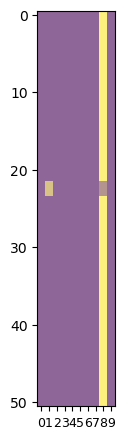

In [7]:
import matplotlib.pyplot as plt

# prepare display
preds_bin = [make_binary(b) for b in preds]
target_bin = np.tile(make_binary(number),(len(preds),1))

# plot
fig, ax = plt.subplots(figsize=(1,8))
plt.imshow(preds_bin,alpha=0.5)
plt.imshow(target_bin,alpha=0.2)
ax.set_xticks(range(10))
ax.set_xticklabels(range(10),fontsize=9)
plt.show()

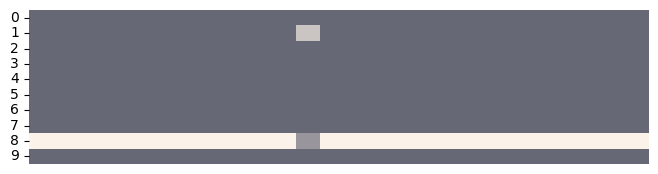

In [8]:
import seaborn as sns



preds_bin = [make_binary(b) for b in preds]
target_bin = np.tile(make_binary(number),(len(preds),1))


fig, ax = plt.subplots(figsize=(8,2))
sns.heatmap(np.transpose(preds_bin),alpha=0.5, cbar=False, xticklabels=False)
sns.heatmap(np.transpose(target_bin),alpha=0.2, cbar=False, xticklabels=False)
plt.yticks(rotation=0)
plt.show()

NameError: name 'position_x' is not defined

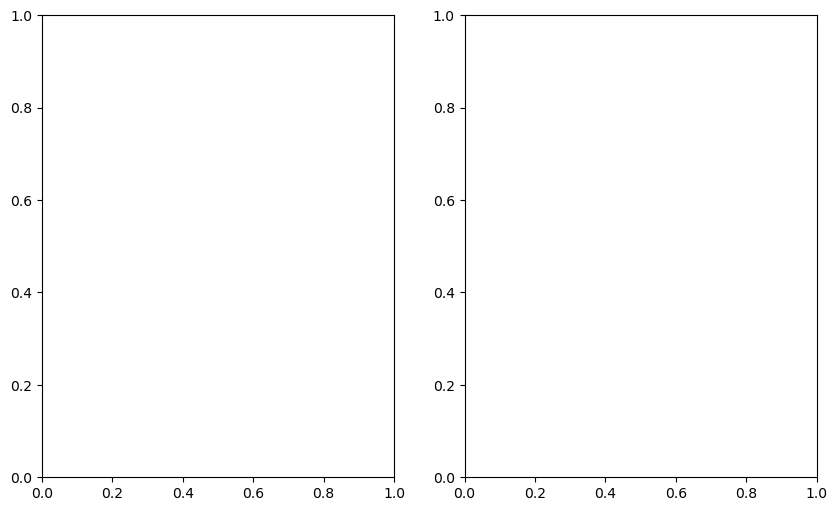

In [69]:
print(sns.__version__)

0.12.2


In [67]:
for i in range(len(preds)):
    print(np.concatenate((preds_bin[:1+i] , np.tile(np.zeros(10),(len(preds)-i+1,1))), axis=0))

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [ ]:
import time

fig, ax = plt.subplots()

max_x = 5
max_rand = 10

x = np.arange(0, max_x)
ax.set_ylim(0, max_rand)
line, = ax.plot(x, np.random.randint(0, max_rand, max_x))
the_plot = st.pyplot(plt)

def init():  # give a clean slate to start
    line.set_ydata([np.nan] * len(x))

def animate(i):  # update the y values (every 1000ms)
    line.set_ydata(np.random.randint(0, max_rand, max_x))
    the_plot.pyplot(plt)

init()
for i in range(100):
    animate(i)
    time.sleep(0.1)

# plot the (animated )drawing

In [11]:
import numpy as np

def calculate_position_irregular(acceleration, timesteps):
    position = np.zeros_like(acceleration)
    for i in range(1, len(acceleration)):
        dt1 = timesteps[i - 1]
        dt2 = timesteps[i]
        average_acceleration = (acceleration[i - 1] + acceleration[i]) / 2
        position[i] = position[i - 1] + dt1 * average_acceleration + dt2 * average_acceleration
    return position


position_x = calculate_position_irregular(data.raw_acceleration_x, data.t)
position_y = calculate_position_irregular(data.raw_acceleration_y, data.t)
position_z = calculate_position_irregular(data.raw_acceleration_z, data.t)



[Text(0, 0.0, ''),
 Text(0, 0.2, ''),
 Text(0, 0.4, ''),
 Text(0, 0.6000000000000001, ''),
 Text(0, 0.8, ''),
 Text(0, 1.0, '')]

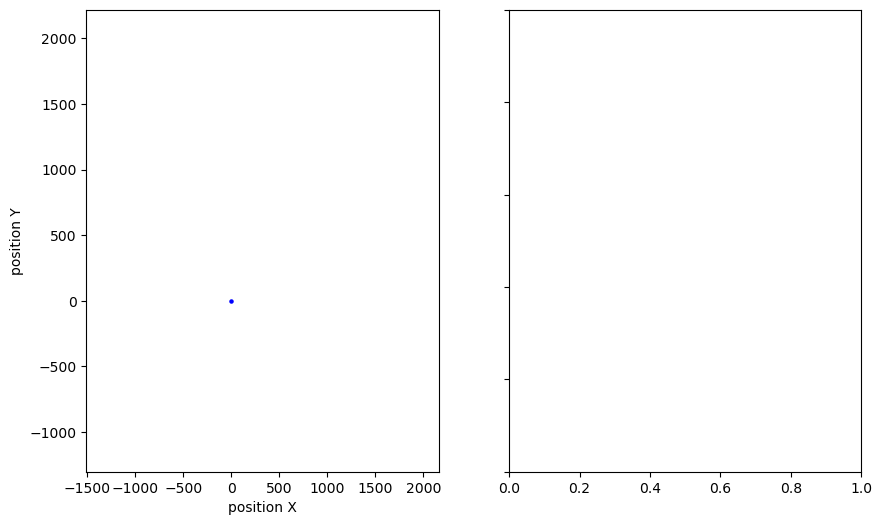

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))  # Create a figure with two axes
t = len(data)


# initialize scatter plot
ax1.scatter(position_x[0], position_y[0], c="b", s=5)
ax1.set(xlim=[position_x.min(),position_x.max()],\
        ylim=[position_y.min(),position_y.max()],\
            xlabel='position X', ylabel='position Y')
ax1.set_title("Position")
ax2.set_yticklabels("")
ax2.set_title("Predictions")


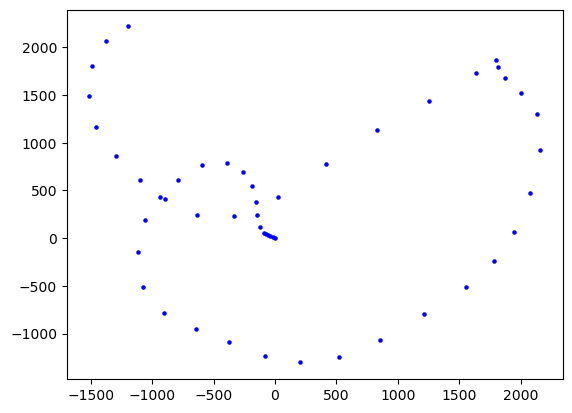

In [22]:
fig, ax = plt.subplots()
t = len(data)

scat = ax.scatter(position_x, position_y, c="b", s=5, label=f'v0 = m/s')

In [15]:


#%matplotlib widget


# prepare data
from sklearn.preprocessing import StandardScaler
# make figure
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import numpy as np

# prepare data


# make figure
fig, ax = plt.subplots()
t = len(data)


ax.set(xlim=[data.x.min(),data.x.max()],\
        ylim=[data.y.min(),data.y.max()],\
              xlabel='Time [s]', ylabel='Z [m]')
scat = ax.scatter(data.x[0], data.y[0], c="b", s=5, label=f'v0 = m/s')

def update(frame):
    # for each frame, update the data stored on each artist.
    x = data.x[:frame]
    y = data.y[:frame]
    # update the scatter plot:
    data_slice = np.stack([x, y]).T
    scat.set_offsets(data_slice)
    return scat

ani = animation.FuncAnimation(fig=fig, func=update, frames=len(data), interval=50)
plt.show()
